<a href="https://colab.research.google.com/github/vchandraiitk/datascience/blob/main/Vikas_M6_NB_MiniProject_1_Image_Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [1]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

### Import Required packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [4]:
# YOUR CODE HERE
features=[]
labels=[]
images=[]
class_label_counter = {}
image_folder_path = '/content/FullIJCNN2013'
for class_folder in glob.glob(os.path.join(image_folder_path, '*')):
    #print(class_folder)
    if os.path.isfile(class_folder):
        continue

    class_label = int(os.path.basename(class_folder))

    #print(class_label)
    added = False
    for image_path in glob.glob(os.path.join(class_folder, '*.ppm')):
        img = Image.open(image_path)
        img = img.resize((30, 30))
        image_array = np.array(img).flatten()
        features.append(image_array)
        labels.append(class_label)
        if class_label_counter.get(class_label) is None:
            class_label_counter[class_label] = 1
        else:
            class_label_counter[class_label] += 1

        #print(image_path)
        if added == False:
            added = True
            images.append(Image.open(image_path))
            #print(len(images))


In [5]:
#print(labels)
#print(features)

### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

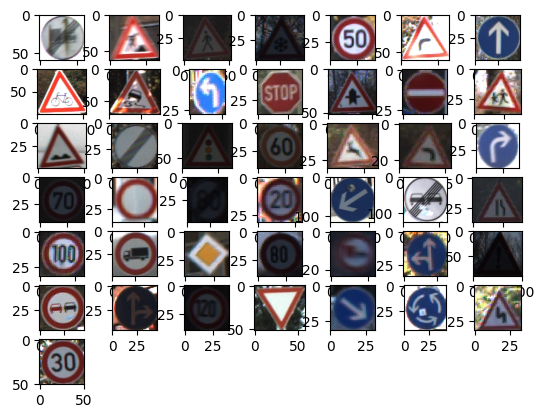

In [6]:
# YOUR CODE HERE
for i in range (1, 44):
    plt.subplot(7, 7, i)
    plt.imshow(images[i-1])
plt.show()

#### Plot the distribution of Classes

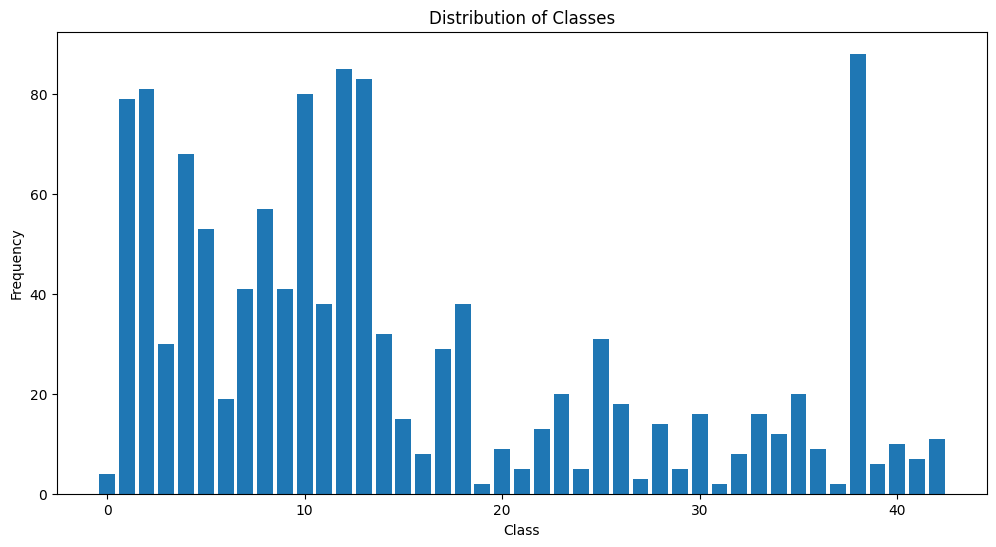

In [7]:
# YOUR CODE HERE
plt.figure(figsize=(12, 6))
plt.bar(class_label_counter.keys(), class_label_counter.values())

plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Distribution of Classes")
plt.show()

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [8]:
# YOUR CODE HERE
normalized_features = preprocessing.normalize(features)
normalized_features

array([[0.02692043, 0.02692043, 0.02692043, ..., 0.02692043, 0.02692043,
        0.02692043],
       [0.01470879, 0.01389163, 0.01470879, ..., 0.00980586, 0.0089887 ,
        0.0089887 ],
       [0.00675243, 0.00604165, 0.00533087, ..., 0.01137251, 0.00995095,
        0.00817399],
       ...,
       [0.04900644, 0.04386212, 0.0422376 , ..., 0.0105594 , 0.00947638,
        0.01001789],
       [0.02231817, 0.02211891, 0.02072402, ..., 0.01315178, 0.0097642 ,
        0.00836932],
       [0.01945295, 0.01626394, 0.01498834, ..., 0.00701582, 0.00701582,
        0.00701582]])

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [9]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape, len(y_train), len(y_test)

((970, 2700), (243, 2700), 970, 243)

In [11]:
model = MLPClassifier(activation='relu', max_iter=10000, hidden_layer_sizes=(4))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [12]:
print(f"Accuracy: {accuracy}")

# Generate a classification report
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.2139917695473251
              precision    recall  f1-score   support

           1       0.14      0.67      0.23         9
           2       0.11      0.12      0.11        16
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00        11
           8       0.33      0.07      0.11        15
           9       0.00      0.00      0.00         6
          10       0.27      1.00      0.42        15
          11       0.00      0.00      0.00        10
          12       0.26      0.30      0.28        20
          13       0.29      0.57      0.38        14
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [13]:
# YOUR CODE HERE
# Create an MLPClassifier object
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42, alpha=0.01)  # Change hyperparameters here

# Fit the data by specifying epochs and evaluate the model
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8806584362139918


#### Try the different algorithms and compare the results with MLP classifier

In [14]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# Make predictions on the test set for each model
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Calculate accuracy for each model
lr_accuracy = accuracy_score(y_test, lr_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Print the accuracies
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")


Logistic Regression Accuracy: 0.46502057613168724
Random Forest Accuracy: 0.823045267489712
SVM Accuracy: 0.6831275720164609
KNN Accuracy: 0.5596707818930041


### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [16]:
print(tf.__version__)

2.17.0


In [17]:
# Step 1 - Build the architecture
# YOUR CODE HERE
num_classes = len(np.unique(y_train))  # Get the number of unique classes in y_train

model = keras.Sequential([
    keras.layers.Dense(300, activation='relu', input_dim=X_train.shape[1]),  # Input layer with correct input features
    keras.layers.Dense(100, activation='relu'),  # Hidden layer
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer with 43 classes (assuming 43 traffic signs)
])

In [18]:
# Step 2 - Compile the model
# YOUR CODE HERE
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [20]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_test, y_test))

Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.0281 - loss: 3.7614 - val_accuracy: 0.0370 - val_loss: 3.7514
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0585 - loss: 3.7472 - val_accuracy: 0.0823 - val_loss: 3.7400
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0652 - loss: 3.7346 - val_accuracy: 0.0823 - val_loss: 3.7286
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0663 - loss: 3.7249 - val_accuracy: 0.0823 - val_loss: 3.7171
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0688 - loss: 3.7112 - val_accuracy: 0.0823 - val_loss: 3.7059
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0697 - loss: 3.6966 - val_accuracy: 0.0823 - val_loss: 3.6945
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0619 - loss: 3.6851 - val_accuracy: 0.0823 - val_loss: 3.6826
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0709 - loss: 3.6788 - val_accuracy: 0.0823 - val_loss

#### Try the same parameters used for MLP Classifier and build the keras model

In [21]:
# YOUR CODE HERE
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_dim=X_train.shape[1]), # Default hidden layer size 100
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model using 'adam' optimizer and appropriate loss
model.compile(optimizer='adam',  # Default optimizer for MLPClassifier
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test)) # Default max_iter is 200

Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.0543 - loss: 3.6692 - val_accuracy: 0.1070 - val_loss: 3.3980
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1050 - loss: 3.3204 - val_accuracy: 0.1481 - val_loss: 3.3155
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2386 - loss: 3.1903 - val_accuracy: 0.2058 - val_loss: 3.2500
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2378 - loss: 3.1240 - val_accuracy: 0.3045 - val_loss: 3.1558
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3146 - loss: 3.0760 - val_accuracy: 0.2840 - val_loss: 3.0732
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3144 - loss: 2.9351 - val_accuracy: 0.2551 - val_loss: 2.9919
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3271 - loss: 2.8241 - val_accuracy: 0.2757 - val_loss: 2.8895
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3425 - loss: 2.7047 - val_accuracy: 0.3045 - 

#### Experiment using Dropout, Regularization and Batch Normalization

In [22]:
# YOUR CODE HERE
# Create a Keras model with Dropout, Regularization, and Batch Normalization
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_dim=X_train.shape[1],
                       kernel_regularizer=keras.regularizers.l2(0.0001)),  # L2 Regularization
    keras.layers.BatchNormalization(),  # Batch Normalization
    keras.layers.Dropout(0.2),  # Dropout with a rate of 0.2
    keras.layers.Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.2617 - loss: 3.1246 - val_accuracy: 0.1235 - val_loss: 3.5840
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5948 - loss: 1.7891 - val_accuracy: 0.2428 - val_loss: 3.4400
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7290 - loss: 1.3077 - val_accuracy: 0.3045 - val_loss: 3.3385
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7978 - loss: 1.0143 - val_accuracy: 0.4239 - val_loss: 3.2260
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.7971 - val_accuracy: 0.5720 - val_loss: 3.1091
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9023 - loss: 0.6311 - val_accuracy: 0.3951 - val_loss: 2.9802
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9086 - loss: 0.5536 - val_accuracy: 0.6296 - val_loss: 2.8142
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9323 - loss: 0.4837 - val_accuracy: 0.6996 - 

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.